# AIITP - Python Programming (Intake 2)

### Assignment (Due 18 March 2022 2359)

#### Instructions:

1) Do refer to the Assignment hand-out.
2) This the answer template that you can use, as reponse to the assignment. Rename it accordingly to the following naming convention - AY2022_AIITP_YourName_StudentID.ipynb


***

Question 1:

In [1]:
#Write Python code for Question 1 here

def encrypt():
    string = input('enter string: ')
    vowels = {'a':'e','e':'i', 'i':'o', 'o':'u', 'u':'a', #vowel dictionary for both upper and lower case
              'A':'E','E':'I', 'I':'O', 'O':'U', 'U':'A'}
    output = ''#create an empty string to store the encrypted string
    for i in string: #to iterate through each character in the string, string[i]
        if i in vowels: #check if i is in vowels dictionary
            output += vowels[i] #change i according to the key,value pair in vowels dictionary before adding to output string
        else: #if i is not in vowels dictionary then will be added to the output string
            output += i
    print(output[-1::-1])#print the reverse of the string
encrypt()

kceJ,semtsorhC yrriM


Question 2:

In [2]:
# Write Python code for Question 2 here #lesson 3
import openpyxl
workbook = openpyxl.load_workbook('COVID-19-Europe.xlsx')
sheet = workbook['Europe']
sheet2 = workbook.create_sheet("Wigr") #creating new sheet
max_row = sheet.max_row #to know how many rows in total
sheet2.cell(1,1).value = 'Location name' #adding column name
sheet2.cell(1,2).value = 'Weekly infection growth rate' #adding column name

for i in range(2,max_row+1): #start from 2 because 1 is the column name
    sheet2.cell(i,1).value = (sheet.cell(i,2).value) #copying over all countries name from Europe sheet to Wigr sheet
    sheet2.cell(i,2).value= (sheet.cell(i,5).value)/(sheet.cell(i,6).value) #calculating weekly infection growth rate
workbook.save('COVID-19-Europe-WIGR.xlsx') # saving excel file with new name


Question 3a:

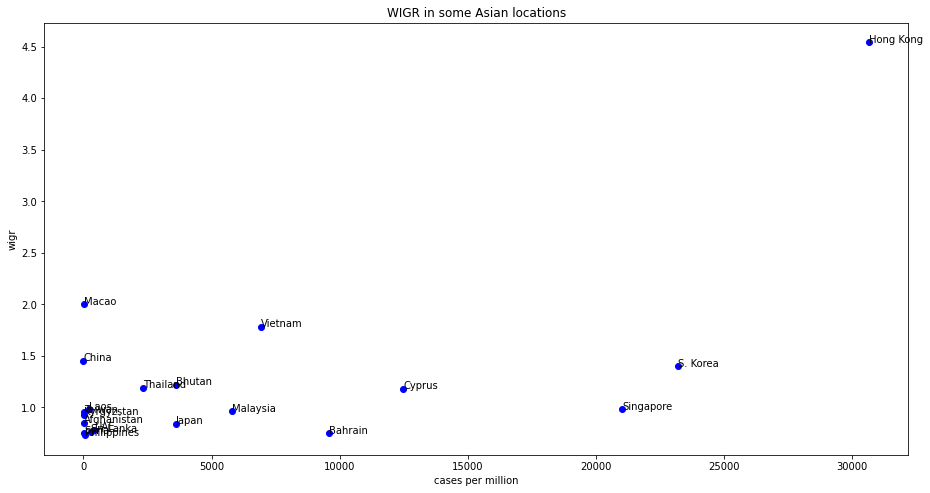

In [12]:
# Write Python code for Question 3a here
import sqlite3
import matplotlib.pyplot as plt
#selecting top 20 asia countries with highest infection growth rate
sql = """SELECT name, wigr,cases_per_million,region
        FROM locations
        WHERE region  = 'Asia'
        ORDER BY wigr DESC
        LIMIT 20
        """

conn = sqlite3.connect('database_wigr.db')
cursor = conn.execute(sql);
records = cursor.fetchall()
name_list = []
wigr_list= []
region_list = []
cases_per_million_list = []
for row in records:
    name_list.append(row[0])#storing name of countries in a list
    wigr_list.append(row[1])#storing wigr of countries in a list
    cases_per_million_list.append(row[2])#storing cases per million of countries in a list
    region_list.append(row[3])#storing region of countries in a list
fig = plt.figure()
ax=fig.add_axes([0,0,2,1.5])
ax.set_title('WIGR in some Asian locations')
ax.set_ylabel('wigr')
ax.set_xlabel('cases per million')
ax.scatter(cases_per_million_list,wigr_list,color='b')
for i, txt in enumerate(name_list):
    ax.annotate(txt, (cases_per_million_list[i],wigr_list[i]))#adding text label to the plot points
plt.savefig('Question3a.jpg',bbox_inches='tight')


Question 3b:

''

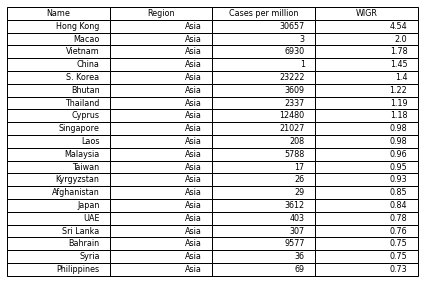

In [22]:
# Write Python code for Question 3b here
import pandas as pd
import numpy as np
import fpdf
import matplotlib.pyplot as plt
#plotting the table in pandas
data = {'Name':name_list,'Region':region_list,'Cases per million':cases_per_million_list,'WIGR':wigr_list,}
#Googled line 8 to 13,14-15, displaying dataframe into a "nicer" table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df =pd.DataFrame(data)
ax.table(cellText=df.values, colLabels=df.columns, loc='center')
fig.tight_layout()
#Adding the 2 images into the pdf and saving it as Question3b.pdf
plt.savefig("WIGR table.jpg", bbox_inches='tight')
document = fpdf.FPDF()
document.set_font("Times","B", 14)
document.set_text_color(19,83,173)
document.add_page()
document.cell(0,10,'WIGR REPORT',0,0,'C');
document.image('Question3a.jpg',x=25, y=20, w=150)
document.add_page()
document.image('WIGR table.jpg',x=25, y=20, w=150)
document.output("Question3b.pdf")


Feedback:Well done!
Points: 19/20